In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
! cargo run --example fig1b --release > fig1b.csv

   Compiling wang-buzsaki v0.1.0 (C:\Rust\codes\CA3-Rust\wang-buzsaki)
 --> examples\fig1b.rs:3:41
  |
3 | use rand::distributions::{Distribution, Normal};
  |                                         ^^^^^^
  |
  = note: `#[warn(deprecated)]` on by default

  --> examples\fig1b.rs:15:14
   |
15 |     let nd = Normal::new(0.0, 0.03);
   |              ^^^^^^^^^^^

    Finished release [optimized] target(s) in 3.05s
     Running `target\release\examples\fig1b.exe`


In [3]:
df = pd.read_csv("fig1b.csv", index_col=0)
df.columns

Index(['1_0_V(mV)', '1_1_V(mV)', '1_2_V(mV)', '1_3_V(mV)', '1_4_V(mV)',
       '1_5_V(mV)', '1_6_V(mV)', '1_7_V(mV)', '1_8_V(mV)', '1_9_V(mV)',
       ...
       '10_90_V(mV)', '10_91_V(mV)', '10_92_V(mV)', '10_93_V(mV)',
       '10_94_V(mV)', '10_95_V(mV)', '10_96_V(mV)', '10_97_V(mV)',
       '10_98_V(mV)', '10_99_V(mV)'],
      dtype='object', length=1000)

In [4]:
names = [[str(i) + "_" + str(j) + "_V(mV)" for j in range(20)] for i in range(1, 11)]

In [5]:
def hz(arr):
    ans = 0
    flg = False
    for v in arr:
        if not flg and v > -20:
            ans += 1
        if v > -20:
            flg = True
        else:
            flg = False
    return ans

In [6]:
f = np.array([[hz(df[n]) for n in name] for name in names])

In [7]:
mu = f.mean(axis=1)
sigma = f.std(axis=1)

In [8]:
x = np.arange(1, 11) / 10

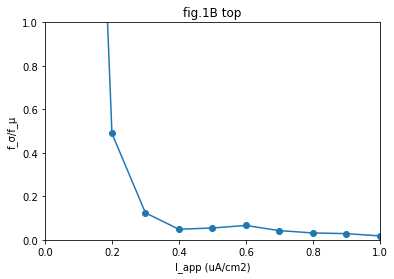

In [9]:
plt.plot(x, sigma/mu, marker="o")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("I_app (uA/cm2)")
plt.ylabel("f_σ/f_μ")
plt.title("fig.1B top")
plt.savefig("fig1BT.png")

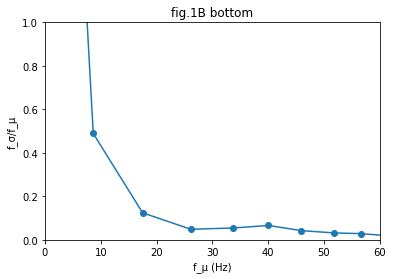

In [10]:
plt.plot(mu, sigma/mu, marker="o")
plt.xlim([0, 60])
plt.ylim([0, 1])
plt.xlabel("f_μ (Hz)")
plt.ylabel("f_σ/f_μ")
plt.title("fig.1B bottom")
plt.savefig("fig1BB.png")